# Homework 12

In [1]:
import numpy as np
import matplotlib                     # for saving to pdf
matplotlib.use('PDF')                # for saving to pdf
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1 (3 points)

Plot pressure $P$ (kPa) versus molar volume $V$ (m$^3$/kmol) for an ideal gas at 300 K. $R_g$ = 8314.46 J/kmol$\cdot$K.
* Let $V$ vary from 0.05 to 1 m$^3$/kmol.

$$ P = \frac{R_gT}{V}.$$

* Include axis labels that include the units. Make the x axis vary from 0 to 1 (m$^3$/kmol) and the y axis vary from 0 to 60000 (kPa).
* Practice using different line styles.

In [2]:
V = np.linspace(0.05,1.05,100)     # m**3/kmol
R = 8.31446                        # kJ/(kmol*K)
T = 300                            # K
P = R*T/V                          # kPa

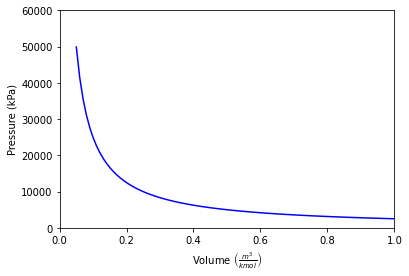

In [3]:
plt.plot(V, P, 'b-')

plt.ylabel("Pressure (kPa)")
plt.ylim([0,60000])
plt.xlabel(r"Volume $\left(\frac{m^3}{kmol}\right)$")
plt.xlim([0,1]);

###### Problem 2 (3 points)

* The Haaland equation below relates the friction factor $f$ in turbulent pipe flow to the Reynolds number $Re$. 
$$\frac{1}{\sqrt{f}} = -1.8\log_{10}\left[\left(\frac{\epsilon/D}{3.7}\right)^{1.11}+ \frac{6.9}{Re}\right].$$

Friction factor can be used to get the pressure drop as fluid flows down a pipe so you know how much pumping power is needed to drive the flow. The Reynolds number is a dimensionless velocity in the pipe. The final parameter is $\epsilon /D$ which is the roughness of the pipe wall divided by the pipe diameter.

* Write a function to compute $f(Re, \epsilon/D)$.
* Create an array of 100 $Re$ points that is uniformly spaced on a log scale, for $1000\le Re\le 1\times 10^8$. You will use function `np.logspace` (instead of `np.linspace`)
* On a single plot, compare f versus Re for $\epsilon/D=$0.01, 0.001, 0.0001, 0.0.
* Reproduce the plot shown below. (Line colors don't need to match perfectly.)

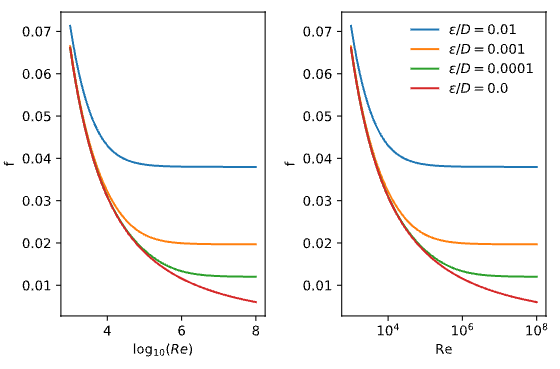


In [4]:
def f(Re, ϵD):
    a = -1.8
    b = 3.7
    c = 1.11
    d = 6.9
    return 1/(a * np.log10((ϵD/b)**c + d/Re))**2

Re = np.logspace(3,8,20)
ϵD = np.array([f(Re, 0.01), f(Re, 0.001), f(Re, 0.0001), f(Re, 0.0)])
colors =           ['blue',     'orange',       'green',      'red']

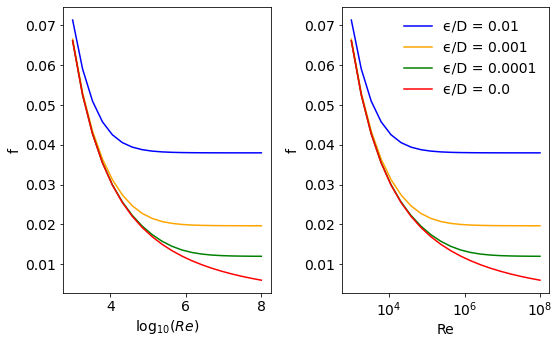

In [5]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'font.size': 14})

plt.subplot(1,2,1)
plt.xscale('linear')
plt.ylabel('f')
plt.xlabel(r"$\log_{10}(Re)$")
for i in range(0,len(ϵD)):
    plt.plot(np.log10(Re), ϵD[i], '-', color=colors[i])
    
plt.subplot(1,2,2)
plt.xscale('log')
plt.ylabel('f')
plt.xlabel("Re")
for i in range(0,len(ϵD)):
    plt.plot(Re, ϵD[i], '-', color=colors[i])
plt.legend(['ϵ/D = 0.01', 'ϵ/D = 0.001', 'ϵ/D = 0.0001', 'ϵ/D = 0.0'], frameon=False, loc='upper right')
    
plt.tight_layout();

## Problem 3 (2 points)

* Use numpy to write the $Re$ data of Problem 2 and the four $f$ curves (for each $\epsilon/D$ value) to a single text file called "haaland.txt".
* Include a header that is descriptive of the columns.
* Use the following format code: "%12.5e".
* Then use numpy to load the data from your "haaland.txt" file into a _new_ array. Print out the old and new data arrays to prove that they are the same.

In [6]:
data = np.column_stack([Re, ϵD[0], ϵD[1], ϵD[2], ϵD[3]])

print("Generated data:")
print(data)

np.savetxt("haaland.txt", data, fmt='%12.5e', delimiter = ',',
           header="         x,    ϵ/D=0.01,   ϵ/D=0.001,  ϵ/D=0.0001,     ϵ/D=0.0")

Generated data:
[[1.00000000e+03 7.13127494e-02 6.65022989e-02 6.61149475e-02
  6.60822470e-02]
 [1.83298071e+03 5.90549153e-02 5.30580185e-02 5.25569358e-02
  5.25144852e-02]
 [3.35981829e+03 5.09838649e-02 4.34599257e-02 4.27906212e-02
  4.27335337e-02]
 [6.15848211e+03 4.57708581e-02 3.64441346e-02 3.55298670e-02
  3.54508844e-02]
 [1.12883789e+04 4.25162044e-02 3.12591974e-02 2.99946695e-02
  2.98828510e-02]
 [2.06913808e+04 4.05603653e-02 2.74421930e-02 2.56918157e-02
  2.55305694e-02]
 [3.79269019e+04 3.94236689e-02 2.46916680e-02 2.23000308e-02
  2.20642394e-02]
 [6.95192796e+04 3.87790976e-02 2.27854746e-02 1.96066580e-02
  1.92587558e-02]
 [1.27427499e+05 3.84194253e-02 2.15305653e-02 1.74708574e-02
  1.69562177e-02]
 [2.33572147e+05 3.82206774e-02 2.07475630e-02 1.57999241e-02
  1.50432150e-02]
 [4.28133240e+05 3.81114728e-02 2.02810558e-02 1.45303527e-02
  1.34365907e-02]
 [7.84759970e+05 3.80516603e-02 2.00124175e-02 1.36094083e-02
  1.20742494e-02]
 [1.43844989e+06 3.80189

In [7]:
loaded_data = np.loadtxt("haaland.txt", delimiter = ',')
print("Loaded data:")
print(loaded_data)

Loaded data:
[[1.00000e+03 7.13127e-02 6.65023e-02 6.61149e-02 6.60822e-02]
 [1.83298e+03 5.90549e-02 5.30580e-02 5.25569e-02 5.25145e-02]
 [3.35982e+03 5.09839e-02 4.34599e-02 4.27906e-02 4.27335e-02]
 [6.15848e+03 4.57709e-02 3.64441e-02 3.55299e-02 3.54509e-02]
 [1.12884e+04 4.25162e-02 3.12592e-02 2.99947e-02 2.98829e-02]
 [2.06914e+04 4.05604e-02 2.74422e-02 2.56918e-02 2.55306e-02]
 [3.79269e+04 3.94237e-02 2.46917e-02 2.23000e-02 2.20642e-02]
 [6.95193e+04 3.87791e-02 2.27855e-02 1.96067e-02 1.92588e-02]
 [1.27427e+05 3.84194e-02 2.15306e-02 1.74709e-02 1.69562e-02]
 [2.33572e+05 3.82207e-02 2.07476e-02 1.57999e-02 1.50432e-02]
 [4.28133e+05 3.81115e-02 2.02811e-02 1.45304e-02 1.34366e-02]
 [7.84760e+05 3.80517e-02 2.00124e-02 1.36094e-02 1.20742e-02]
 [1.43845e+06 3.80190e-02 1.98611e-02 1.29798e-02 1.09091e-02]
 [2.63665e+06 3.80011e-02 1.97771e-02 1.25755e-02 9.90475e-03]
 [4.83293e+06 3.79913e-02 1.97308e-02 1.23296e-02 9.03300e-03]
 [8.85867e+06 3.79860e-02 1.97054e-02 1.21